
First 5 rows of data:
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used

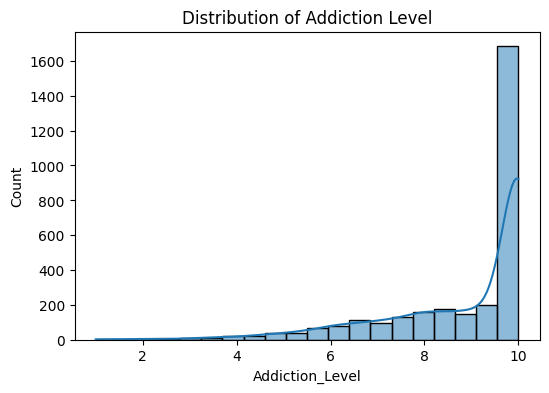

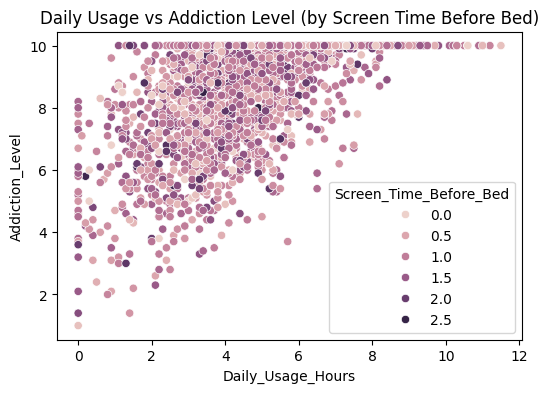

Linear Regression: MSE=0.90, R2=64.11
Random Forest: MSE=0.35, R2=86.16
Gradient Boosting: MSE=0.23, R2=90.79

✅ Best Model: Gradient Boosting (R2 = 90.79)



In [2]:

# Mobile Addiction Prediction Project

# Import the required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1) Load dataset

CSV_PATH = "/content/teen_phone_addiction_dataset.csv"
df = pd.read_csv(CSV_PATH)

print("\nFirst 5 rows of data:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


# 2) Basic EDA (Exploratory Data Analysis)

plt.figure(figsize=(6,4))
sns.histplot(df["Addiction_Level"], bins=20, kde=True)
plt.title("Distribution of Addiction Level")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Daily_Usage_Hours",
    y="Addiction_Level",
    hue="Screen_Time_Before_Bed"   # ✅ fixed
)
plt.title("Daily Usage vs Addiction Level (by Screen Time Before Bed)")
plt.show()



# 3) Prepare Data

y = df["Addiction_Level"]   # target column
X = df.drop(columns=["Addiction_Level", "ID", "Name"])  # features only

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

# Encode categorical columns
preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)],
    remainder="passthrough"
)


# 4) Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5) Build Models

linreg = Pipeline([("prep", preprocess), ("model", LinearRegression())])
rfreg  = Pipeline([("prep", preprocess), ("model", RandomForestRegressor(random_state=42))])
gbreg  = Pipeline([("prep", preprocess), ("model", GradientBoostingRegressor(random_state=42))])

# Train models
linreg.fit(X_train, y_train)
rfreg.fit(X_train, y_train)
gbreg.fit(X_train, y_train)


# 6) Evaluate Models

def evaluate(model, X_test, y_test, name):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name}: MSE={mse:.2f}, R2={r2*100:.2f}")
    return r2

scores = {
    "Linear Regression": evaluate(linreg, X_test, y_test, "Linear Regression"),
    "Random Forest":     evaluate(rfreg, X_test, y_test, "Random Forest"),
    "Gradient Boosting": evaluate(gbreg, X_test, y_test, "Gradient Boosting")
}

# Pick best model
best_name = max(scores, key=scores.get)
best_model = {"Linear Regression": linreg, "Random Forest": rfreg, "Gradient Boosting": gbreg}[best_name]

print(f"\n✅ Best Model: {best_name} (R2 = {scores[best_name]*100:.2f})\n")



In [3]:

# 7) Interactive CLI

def addiction_category(score):
    """Convert numeric score into Low/Moderate/Severe"""
    if score < 40:
        return "Low Addiction"
    elif score < 70:
        return "Moderate Addiction"
    else:
        return "Severe Addiction"

print("=== Mobile Addiction Prediction CLI ===")
print("Type 'quit' anytime to exit.\n")

while True:
    age = input("Enter Age (e.g. 20): ")
    if age.lower() == "quit": break

    daily_use = input("Enter Daily Phone Use in hours (e.g. 5): ")
    if daily_use.lower() == "quit": break

    night_use = input("Do you use phone at night? (Yes/No): ")
    if night_use.lower() == "quit": break

    social_media = input("Enter Social Media Use in hours (e.g. 3): ")
    if social_media.lower() == "quit": break

    # Create user input DataFrame
    user_data = {
        "Age": [float(age)],
        "Daily_Usage_Hours": [float(daily_use)],
        "Night_Use": ["Yes" if night_use.upper()=="YES" else "No"],
        "Time_on_Social_Media": [float(social_media)]
    }
    user_df = pd.DataFrame(user_data)

    # Add missing columns if any
    for col in X.columns:
        if col not in user_df.columns:
            if col in cat_cols:
                user_df[col] = "Unknown"
            else:
                user_df[col] = 0.0

    user_df = user_df[X.columns]  # reorder columns

    # Predict
    score = best_model.predict(user_df)[0]
    category = addiction_category(score)

    print(f"\nPredicted Addiction Score: {score:.2f}")
    print(f"Category: {category}\n")


=== Mobile Addiction Prediction CLI ===
Type 'quit' anytime to exit.

Enter Age (e.g. 20): quit
